Zajecia 1 zadanie 4

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('train/in.tsv', header=None, sep='\t')
df.columns = ['price', 'mileage', 'year', 'brand', 'engingeType', 'engineCapacity']
df = pd.DataFrame(df, columns = ['price', 'mileage', 'year', 'brand', 'engingeType', 'engineCapacity'])
df.head()

,price,mileage,year,brand,engingeType,engineCapacity
0,92000,75600,2012,Volvo,benzyna,3200
1,49300,21000,2016,Kia,diesel,1396
2,45900,66000,2015,Toyota,diesel,1400
3,32900,115000,2015,Skoda,diesel,1600
4,36900,200000,2012,Renault,diesel,2000


In [3]:
print df.corr()

                   price   mileage      year  engineCapacity
price           1.000000 -0.456966  0.544610        0.329526
mileage        -0.456966  1.000000 -0.585090        0.191366
year            0.544610 -0.585090  1.000000       -0.139172
engineCapacity  0.329526  0.191366 -0.139172        1.000000


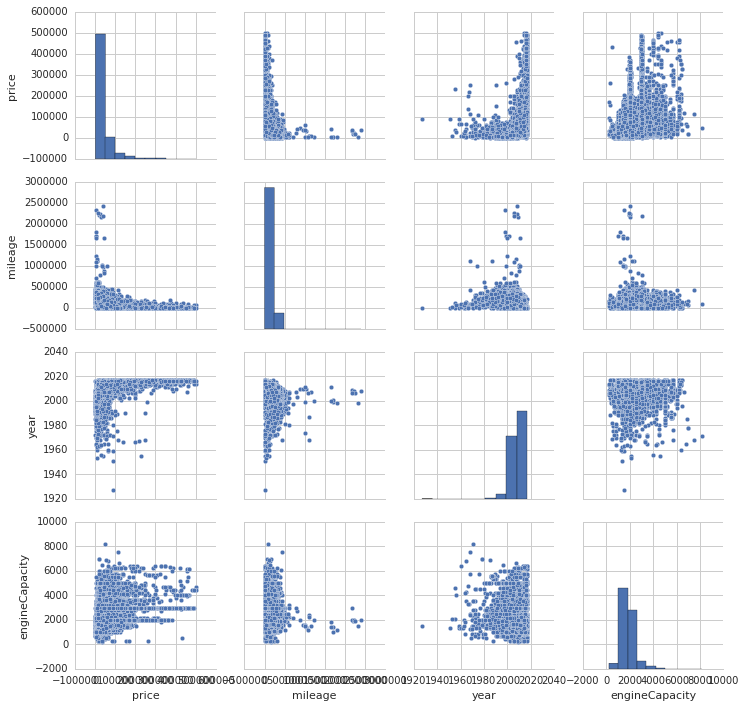

In [4]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['price', 'mileage', 'year', 'brand', 'engingeType', 'engineCapacity']
sns.pairplot(df[cols], size=2.5)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
X = pd.DataFrame(df, columns = ['mileage', 'year','engineCapacity'])
lm = LinearRegression()
lm.fit(X, df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print 'Punkt przecięcia:', lm.intercept_
print 'Liczba współczynników:', len(lm.coef_)

Punkt przecięcia: -7141738.07126
Liczba współczynników: 3


In [31]:
lm.predict(X)

array([ 107958.76692543,   68199.63913288,   58247.45151029, ...,
         10258.14705483,   13313.40494179,   66264.73950524])

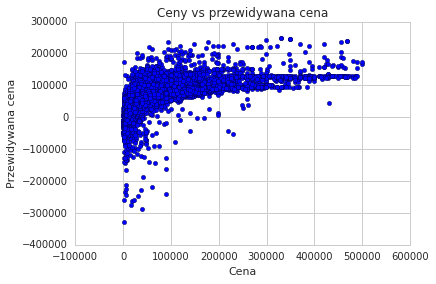

In [37]:
plt.scatter(df.price, lm.predict(X))
plt.xlabel('Cena')
plt.ylabel('Przewidywana cena')
plt.title('Ceny vs przewidywana cena')

In [33]:
rd = pd.read_csv('dev-0/in.tsv', sep='\t', names=['mileage', 'year', 'brand', 'engingeType', 'engineCapacity'])
rd.head()                                                  

,mileage,year,brand,engingeType,engineCapacity
0,77000,2015,Ford,diesel,2000
1,186146,2006,Mercedes-Benz,benzyna,1498
2,192000,2007,Nissan,diesel,2500
3,220000,2003,Ford,diesel,1997
4,248000,2008,Volkswagen,diesel,1900


In [34]:
kf = lm.predict(pd.DataFrame(rd, columns=['mileage', 'year', 'engineCapacity']))

In [35]:
pd.DataFrame(kf).to_csv('dev-0/out.tsv')

In [38]:
ui = pd.read_csv('test-A/in.tsv', sep='\t', names=['mileage', 'year', 'brand', 'engingeType', 'engineCapacity'])
ui.head()

,mileage,year,brand,engingeType,engineCapacity
0,203000,2010,Renault,diesel,1500
1,39000,2008,Citroen,benzyna,1000
2,190000,2005,Peugeot,diesel,1600
3,230000,2001,Volkswagen,benzyna,1598
4,189000,2000,BMW,benzyna,1600


In [42]:
er = lm.predict(pd.DataFrame(ui, columns=['mileage', 'year', 'engineCapacity']))

In [43]:
pd.DataFrame(er).to_csv('test-A/out.tsv')